In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/artists.csv")

In [3]:
df.head()

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"


In [4]:
# Check null values
null_values = df.isnull().sum()
print(null_values)


Artist          0
Streams         0
Daily           6
As lead        16
Solo           69
As feature    338
dtype: int64


In [5]:
# Clean the Null Valus
df.dropna(subset=['Daily'], inplace=True)
df.dropna(subset=['Daily', 'As lead', 'Solo', 'As feature'], inplace=True)


In [6]:
null_values_after_drop = df.isnull().sum()
print(null_values_after_drop)


Artist        0
Streams       0
Daily         0
As lead       0
Solo          0
As feature    0
dtype: int64


In [7]:
# Check the Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      2595 non-null   object 
 1   Streams     2595 non-null   object 
 2   Daily       2595 non-null   float64
 3   As lead     2595 non-null   object 
 4   Solo        2595 non-null   object 
 5   As feature  2595 non-null   object 
dtypes: float64(1), object(5)
memory usage: 141.9+ KB


In [8]:
# Summary ststistics
df.describe()

,Daily
count,2595.000000
mean,1.914374
std,3.946430
min,0.002000
25%,0.477000
50%,0.879000
75%,1.795000
max,85.793000


In [11]:
import matplotlib.pyplot as plt

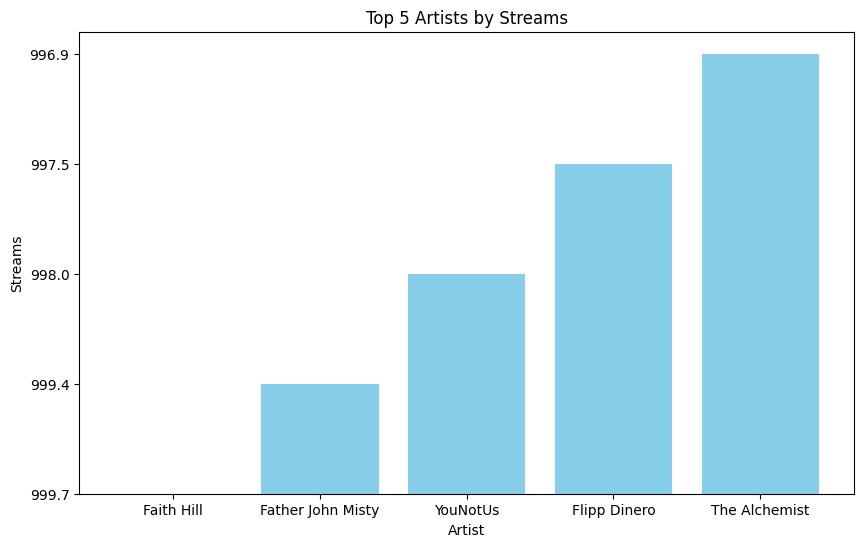

In [12]:
# Visualization 1: Bar plot of top 5 artists by Streams
top_artists = df.sort_values(by='Streams', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_artists['Artist'], top_artists['Streams'], color='skyblue')
plt.title('Top 5 Artists by Streams')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.show()

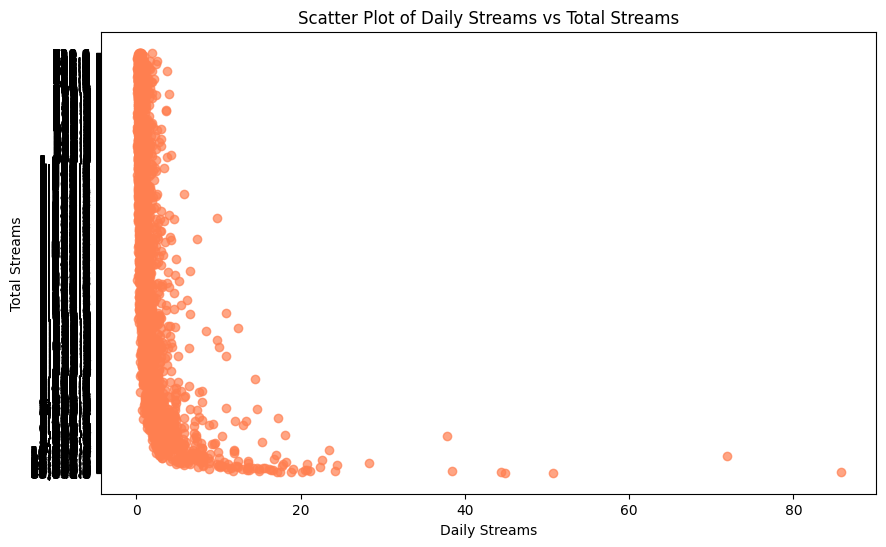

In [13]:
# Visualization 2: Scatter plot of Daily streams vs Streams
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily'], df['Streams'], color='coral', alpha=0.7)
plt.title('Scatter Plot of Daily Streams vs Total Streams')
plt.xlabel('Daily Streams')
plt.ylabel('Total Streams')
plt.show()

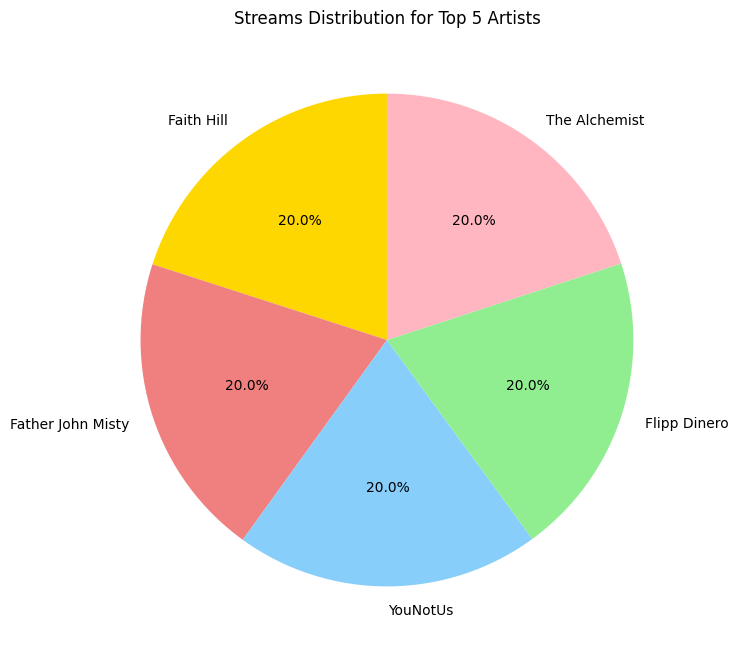

In [15]:
# Visualization 4: Pie chart of Streams distribution for the top 5 artists
plt.figure(figsize=(8, 8))
plt.pie(top_artists['Streams'], labels=top_artists['Artist'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.title('Streams Distribution for Top 5 Artists')
plt.show()

In [17]:
# Remove commas and convert columns to numeric
numeric_columns = ['Streams', 'Daily', 'As lead', 'Solo', 'As feature']

for column in numeric_columns:
    df[column] = df[column].replace(',', '', regex=True).astype(float)




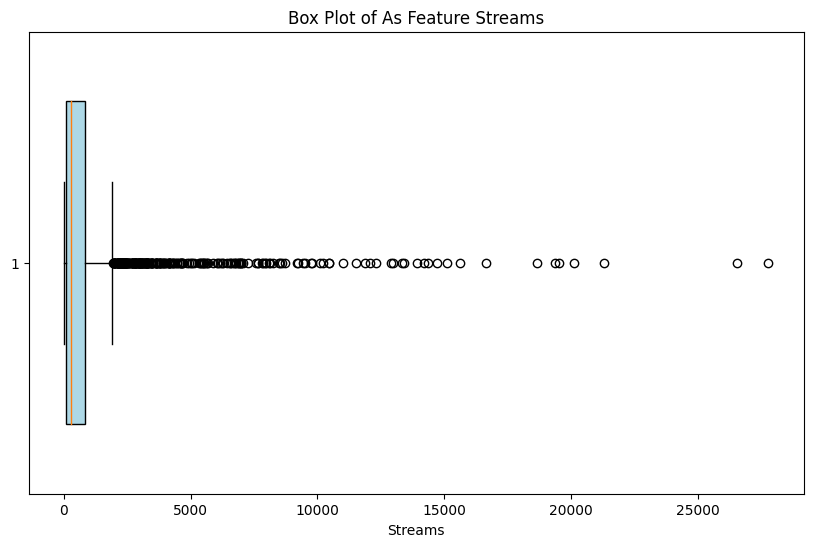

In [18]:
# Visualization 5: Box plot of As feature streams
plt.figure(figsize=(10, 6))
plt.boxplot(df['As feature'].astype(float).dropna(), vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of As Feature Streams')
plt.xlabel('Streams')
plt.show()

# **Recurrent Neural Network**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [20]:
# Extract features and target variable
features = df[['Streams', 'As lead', 'Solo', 'As feature']]
target = df['Daily']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [21]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Reshape data for input to LSTM (assuming you have a time dimension)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [23]:
# Build the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
# Train the model
model_rnn.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/5
65/65 [==============================] - 2s 8ms/step - loss: 20.6013 - val_loss: 11.2149
Epoch 2/5
65/65 [==============================] - 0s 5ms/step - loss: 19.5317 - val_loss: 10.2266
Epoch 3/5
65/65 [==============================] - 0s 4ms/step - loss: 18.1368 - val_loss: 9.1912
Epoch 4/5
65/65 [==============================] - 0s 4ms/step - loss: 16.5581 - val_loss: 8.3261
Epoch 5/5
65/65 [==============================] - 0s 4ms/step - loss: 15.1633 - val_loss: 7.7956


# **Generative Adversarial Network**

In [25]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam


In [26]:
# Set random seed for reproducibility
np.random.seed(1000)

# Define the generator model
def build_generator(latent_dim, output_dim):
    generator = Sequential()
    generator.add(Dense(256, input_dim=latent_dim))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Dense(512))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Dense(1024))
    generator.add(LeakyReLU(alpha=0.2))
    generator.add(BatchNormalization(momentum=0.8))
    generator.add(Dense(output_dim, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return generator

# Define the discriminator model
def build_discriminator(input_dim):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=input_dim))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return discriminator

In [27]:
# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return gan

In [28]:
# Set hyperparameters
latent_dim = 100
input_dim = 784  # For example, if you're generating images of size 28x28

# Build and compile the generator, discriminator, and GAN models
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)
gan = build_gan(generator, discriminator)

# Display the summary of the GAN model
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_1 (Sequential)   (None, 784)               1493520   
                                                                 
 sequential_2 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2953745 (11.27 MB)
Trainable params: 1489936 (5.68 MB)
Non-trainable params: 1463809 (5.58 MB)
_________________________________________________________________


1/1 [==============================] - 0s 37ms/step


TypeError: ignored

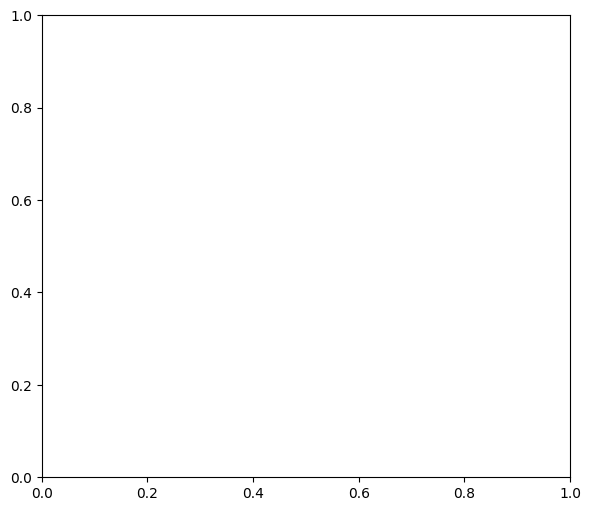

In [33]:
import matplotlib.pyplot as plt
from numpy.random import randn

# Assuming you have a real dataset loaded into a variable named real_data
# Replace this with your actual real data
real_data = ...

# Number of samples to generate
num_samples = 10

# Generate random latent points
random_latent_points = randn(latent_dim * num_samples)
random_latent_points = random_latent_points.reshape(num_samples, latent_dim)

# Generate synthetic samples using the GAN generator
generated_samples = generator.predict(random_latent_points)

# Plot real and generated samples side by side
plt.figure(figsize=(15, 6))

# Plot real samples
plt.subplot(1, 2, 1)
for i in range(num_samples):
    plt.imshow(real_data[i].reshape(28, 28), cmap='gray_r', alpha=0.8)
    plt.title('Real Samples')
    plt.axis('off')

# Plot generated samples
plt.subplot(1, 2, 2)
for i in range(num_samples):
    plt.imshow(generated_samples[i].reshape(28, 28), cmap='gray_r', alpha=0.8)
    plt.title('Generated Samples')
    plt.axis('off')

plt.show()
